In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=150, skip_top=20)
print(X_train.shape, y_train.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [3]:
x_data = np.concatenate((X_train, X_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

In [4]:
np.random.seed(42) 
shuffle_indices = np.random.permutation(len(x_data))
x_data = x_data[shuffle_indices]
y_data = y_data[shuffle_indices]

In [5]:
num_training_samples = 20000 
X_train = x_data[:num_training_samples]
y_train = y_data[:num_training_samples]
X_val = x_data[num_training_samples:]
y_val = y_data[num_training_samples:]

In [6]:
max_sequence_length = 100 
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='pre', truncating='pre')
X_val = pad_sequences(X_val, maxlen=max_sequence_length, padding='pre', truncating='pre')
X_test = pad_sequences(X_test, maxlen=max_sequence_length, padding='pre', truncating='pre')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=150, output_dim=128))
model.add(LSTM(units=64)) 
model.add(Dense(units=1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
157/157 [==============================] - 32s 188ms/step - loss: 0.6287 - accuracy: 0.6329 - val_loss: 0.5718 - val_accuracy: 0.7039
Epoch 2/5
157/157 [==============================] - 29s 188ms/step - loss: 0.5743 - accuracy: 0.7002 - val_loss: 0.5760 - val_accuracy: 0.6971
Epoch 3/5
157/157 [==============================] - 29s 187ms/step - loss: 0.5633 - accuracy: 0.7077 - val_loss: 0.5801 - val_accuracy: 0.7019
Epoch 4/5
157/157 [==============================] - 29s 185ms/step - loss: 0.5561 - accuracy: 0.7132 - val_loss: 0.5661 - val_accuracy: 0.7062
Epoch 5/5
157/157 [==============================] - 30s 191ms/step - loss: 0.5566 - accuracy: 0.7156 - val_loss: 0.5563 - val_accuracy: 0.7113


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         19200     
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 68,673
Trainable params: 68,673
Non-trainable params: 0
_________________________________________________________________




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


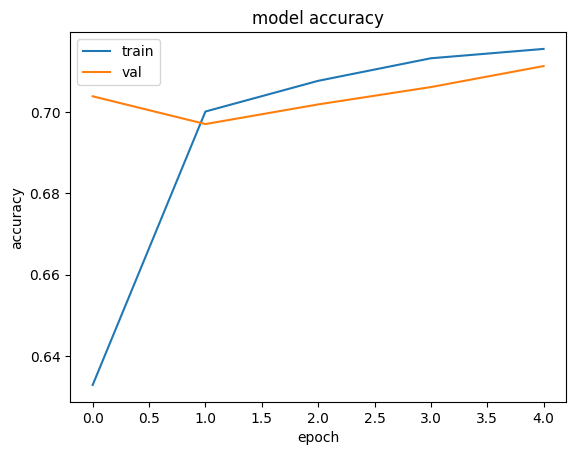

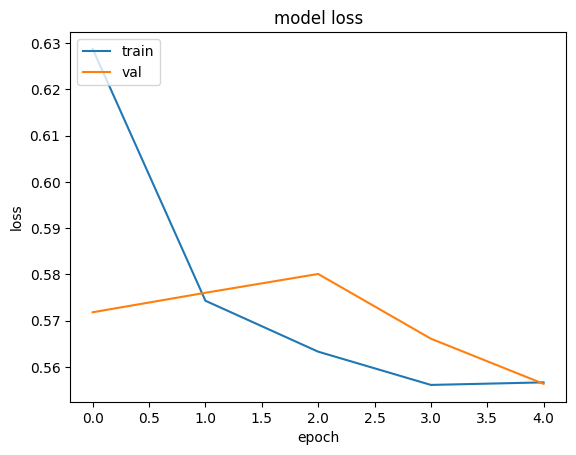

In [10]:
print("\n")
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

782/782 [==============================] - 9s 12ms/step - loss: 0.5483 - accuracy: 0.7167
Test Loss: 0.5483226180076599
Test Accuracy: 0.7166799902915955


In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
157/157 [==============================] - 29s 185ms/step - loss: 0.5523 - accuracy: 0.7154 - val_loss: 0.5535 - val_accuracy: 0.7119
Epoch 2/20
157/157 [==============================] - 30s 190ms/step - loss: 0.5517 - accuracy: 0.7161 - val_loss: 0.5625 - val_accuracy: 0.7070
Epoch 3/20
157/157 [==============================] - 29s 183ms/step - loss: 0.5506 - accuracy: 0.7169 - val_loss: 0.5529 - val_accuracy: 0.7141
Epoch 4/20
157/157 [==============================] - 30s 189ms/step - loss: 0.5451 - accuracy: 0.7190 - val_loss: 0.5524 - val_accuracy: 0.7132
Epoch 5/20
157/157 [==============================] - 29s 186ms/step - loss: 0.5458 - accuracy: 0.7200 - val_loss: 0.5627 - val_accuracy: 0.7097
Epoch 6/20
157/157 [==============================] - 29s 184ms/step - loss: 0.5458 - accuracy: 0.7211 - val_loss: 0.5500 - val_accuracy: 0.7164
Epoch 7/20
157/157 [==============================] - 40s 257ms/step - loss: 0.5369 - accuracy: 0.7235 - val_loss: 0.5529 - val_ac



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


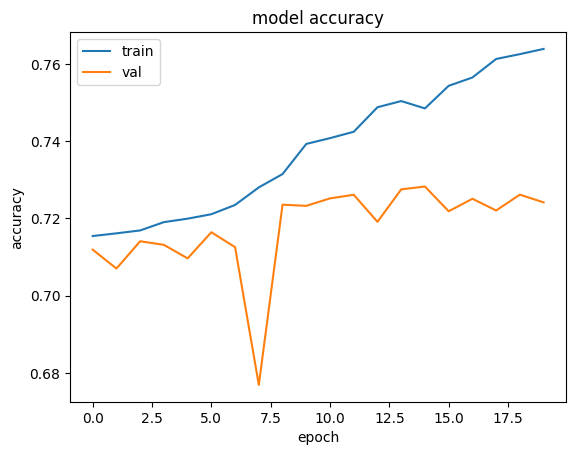

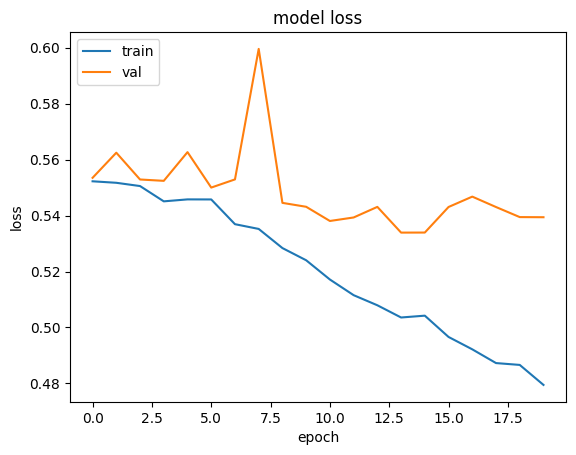

In [13]:
print("\n")
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

782/782 [==============================] - 11s 13ms/step - loss: 0.5060 - accuracy: 0.7454
Test Loss: 0.5059649348258972
Test Accuracy: 0.7453600168228149


a) 코드 참고

b) 자연어 처리는 각 값들의 길이가 같아야 한다. 그래서 max_len을 정해서 값들을 맞춰줬다.

또한, 자연어 처리에서 모델의 성능을 높이는 수단으로 embeding과 LSTM이 자주 쓰인다. LSTM에서는 앞선 문제에서 설명했듯이 값에 필수적인 것들만 기억하여 예측력을 높인다. embedding도 LSTM과 비슷한 역활을 한다. 문장에서의 단어의 중요도를 -1~1 사이의 벡터 값으로 출력한다. 숫자로 단어의 함축적 의미를 나타내어 컴퓨터가 읽을 수 있게 만든다.

총 계산할 파라미터는 68000개 정도 된다.

c) 처음 그래프를 봤을 때, trin과 validattion accuracy 그래프가 계속적으로 폭이 줄어졌다. 이는 모델 성능이 좋다는 것을 의미하고 훈련만 더 시키면 더욱 좋은 accuracy를 얻어낼 수 있다는 반증이다. 그래서 학습을 더 시켰고 가설은 맞았다.